# How to compute the Euclidean distance between meshes in correspondence?

In [1]:
import pyvista as pv

from polpo.mesh.geometry import (
    DiscreteSurfaces,
    L2SurfacesMetric,
    PullbackMetric,
    SurfacesSpace,
    vertices_to_array,
)
from polpo.mesh.qoi import centroid2farthest_vertex
from polpo.plot.pyvista import RegisteredMeshesColoredPlotter
from polpo.preprocessing.load.pregnancy.random import get_two_random_meshes

[KeOps] Warning : CUDA was detected, but driver API could not be initialized. Switching to CPU only.


In [2]:
STATIC_VIZ = True
VIZ = 1

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

In [3]:
meshes = get_two_random_meshes(
    target_reduction=0,
    as_pv_surface=True,
)

mesh_a, mesh_b = meshes

In [4]:
if VIZ > 1:
    pl = pv.Plotter(border=False)

    for mesh in meshes:
        pl.add_mesh(mesh.as_pv(), show_edges=True, opacity=0.6)

    pl.show()

In [5]:
image_space = DiscreteSurfaces(mesh_a.faces, equip=False).equip_with_metric(
    L2SurfacesMetric
)

space = SurfacesSpace().equip_with_metric(
    PullbackMetric,
    forward_map=vertices_to_array,
    image_space=image_space,
)

In [6]:
space.metric.squared_dist(mesh_a, mesh_b)

np.float64(3.5032395713595936)

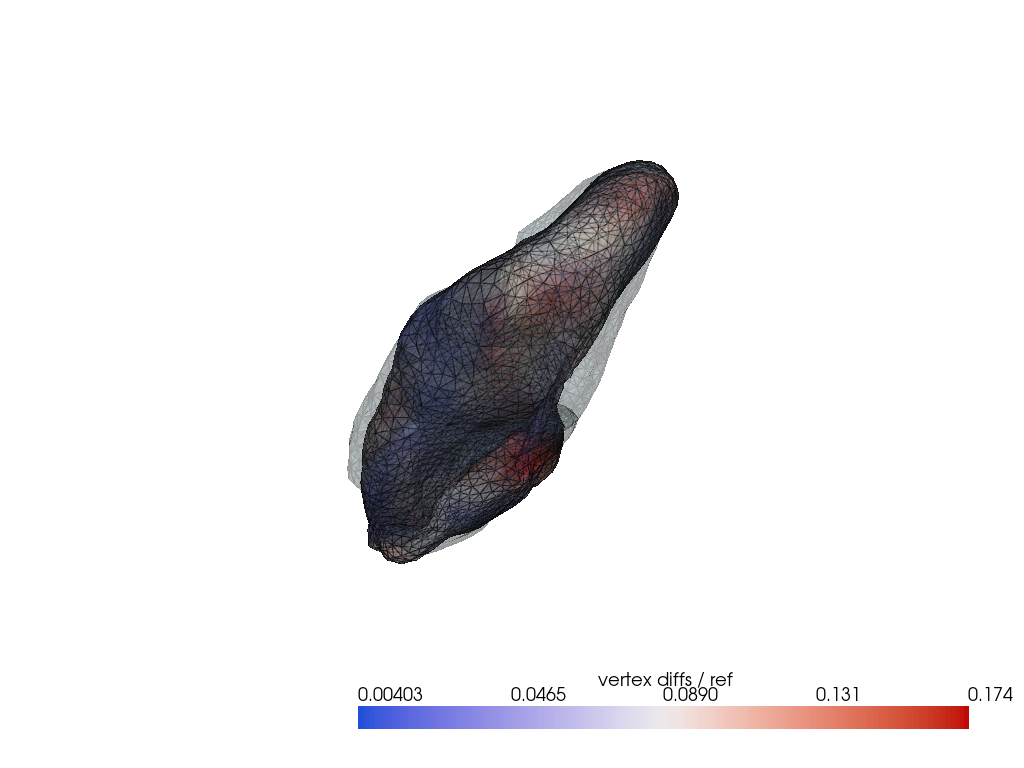

In [7]:
if VIZ > 0:
    ref_dist = centroid2farthest_vertex([mesh_a])[0]

    pl = RegisteredMeshesColoredPlotter()

    pl.add_mesh(mesh_b.as_pv(), show_edges=True, opacity=0.25)

    pl.add_meshes(
        mesh_a.as_pv(),
        mesh_b.as_pv(),
        ref_dist=ref_dist,
        show_edges=True,
        opacity=0.8,
        name="vertex diffs / ref",
        cmap="coolwarm",
    )

    pl.show()